In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.layers import GRU, Embedding, Dense
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

# RNN

In [2]:
max_features = 10000  # nombre de mots à considérer comme caractéristiques
maxlen = 500  # couper les textes après ce nombre de mots (parmi les max_features mots les plus courants)
batch_size = 32

print('Chargement des données...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'séquences d\'entraînement')
print(len(input_test), 'séquences de test')

Chargement des données...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 séquences d'entraînement
25000 séquences de test


In [3]:

print('Remplissage des séquences (échantillons x temps)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Shape de input_train :', input_train.shape)
print('Shape de input_test :', input_test.shape)


Remplissage des séquences (échantillons x temps)
Shape de input_train : (25000, 500)
Shape de input_test : (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - acc: 0.5382 - loss: 0.6868 - val_acc: 0.6288 - val_loss: 0.6408
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.7470 - loss: 0.5353 - val_acc: 0.8002 - val_loss: 0.4441
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - acc: 0.8566 - loss: 0.3480 - val_acc: 0.7770 - val_loss: 0.5231
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.8911 - loss: 0.2776 - val_acc: 0.8280 - val_loss: 0.3934
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - acc: 0.9275 - loss: 0.1953 - val_acc: 0.7860 - val_loss: 0.4782
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - acc: 0.9544 - loss: 0.1341 - val_acc: 0.7956 - val_loss: 0.5133
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - acc: 0.9734 - loss: 0.0868 - val_acc: 0.8138 - val_loss: 0.4966
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.9859 - loss: 0.0527 - val_acc: 0.7752 - val_loss: 0.6315
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 

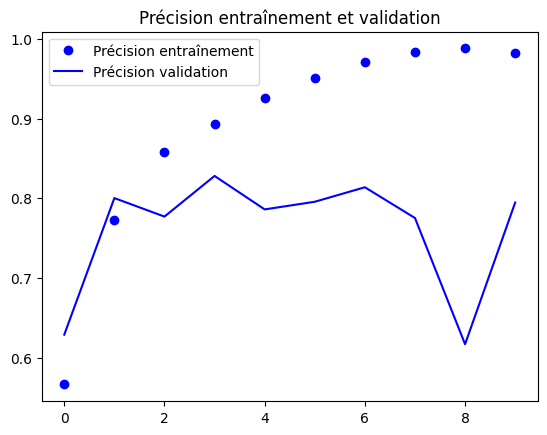

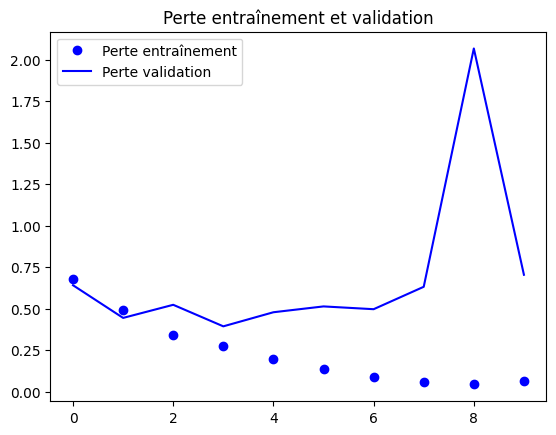

In [6]:
import matplotlib.pyplot as plt

# Données d'historique d'entraînement et de validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Nombre d'époques d'entraînement
epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

# Affichage du graphique
plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

# Affichage du graphique
plt.show()


# LSTM

In [7]:
from keras.layers import LSTM

# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche d'embedding pour transformer les indices de mots en vecteurs de dimension 32
model.add(Embedding(max_features, 32))

# Ajout d'une couche LSTM avec 32 unités
model.add(LSTM(32))

# Ajout d'une couche dense avec une unité et une activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'optimiseur rmsprop, la perte binaire_crossentropy et la métrique de précision
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Entraînement du modèle sur les données d'entraînement avec 10 époques, une taille de batch de 128
# et une validation croisée de 20% des données d'entraînement
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - acc: 0.5471 - loss: 0.6775 - val_acc: 0.7940 - val_loss: 0.4853
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8049 - loss: 0.4448 - val_acc: 0.8452 - val_loss: 0.3634
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.8622 - loss: 0.3423 - val_acc: 0.8382 - val_loss: 0.3692
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.8788 - loss: 0.2994 - val_acc: 0.7784 - val_loss: 0.5759
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8975 - loss: 0.2700 - val_acc: 0.8506 - val_loss: 0.3438
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8990 - loss: 0.2581 - val_acc: 0.8814 - val_loss: 0.3022
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.9159 - loss: 0.2272 - val_acc: 0.8620 - val_loss: 0.3237
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.9172 - loss: 0.2177 - val_acc: 0.8684 - val_loss: 0.3830
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,708 (2.51 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328,355 (1.25 MB)

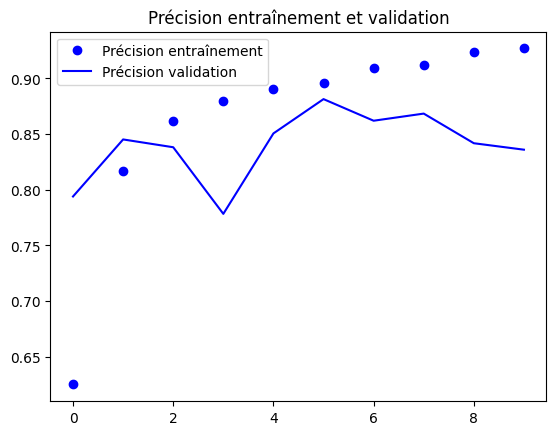

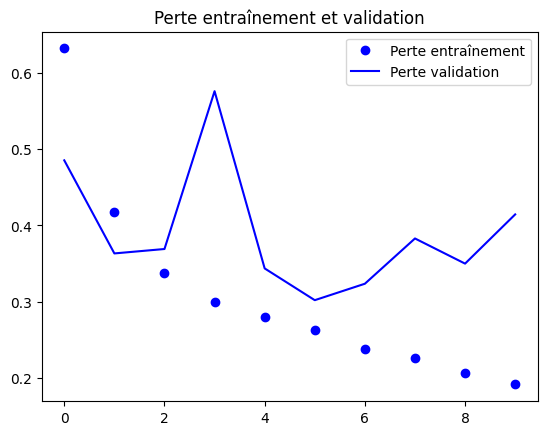

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

plt.show()


# GRU

In [10]:
# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche d'embedding pour transformer les indices de mots en vecteurs de dimension 32
model.add(Embedding(max_features, 32))

# Ajout d'une couche GRU avec 32 unités
model.add(GRU(32))

# Ajout d'une couche dense avec une unité et une activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'optimiseur rmsprop, la perte binaire_crossentropy et la métrique de précision
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [11]:

# Entraînement du modèle sur les données d'entraînement avec 10 époques, une taille de batch de 128
# et une validation croisée de 20% des données d'entraînement
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.5662 - loss: 0.6750 - val_acc: 0.7994 - val_loss: 0.4338
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8089 - loss: 0.4230 - val_acc: 0.8112 - val_loss: 0.4161
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8462 - loss: 0.3586 - val_acc: 0.8268 - val_loss: 0.3952
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8685 - loss: 0.3174 - val_acc: 0.8486 - val_loss: 0.3512
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - acc: 0.8937 - loss: 0.2667 - val_acc: 0.8556 - val_loss: 0.3375
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8997 - loss: 0.2551 - val_acc: 0.8702 - val_loss: 0.3355
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9038 - loss: 0.2503 - val_acc: 0.8836 - val_loss: 0.3013
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9023 - loss: 0.2442 - val_acc: 0.8654 - val_loss: 0.3199
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/

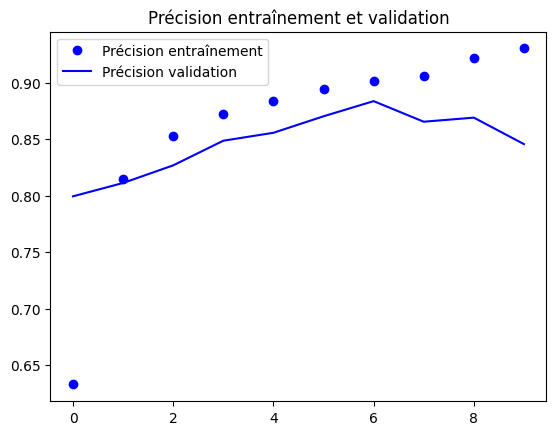

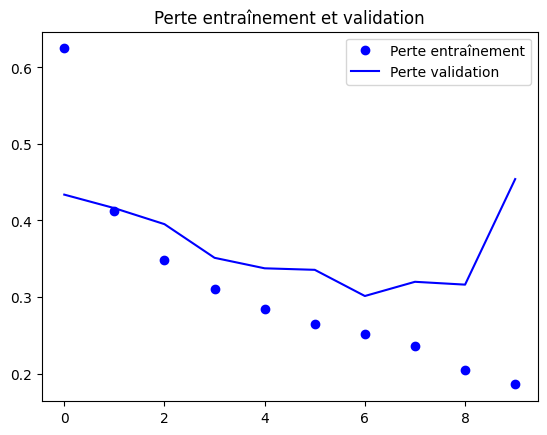

In [12]:

# Affichage des résultats d'entraînement et de validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

plt.show()
